Scientific programming in Python (Winter 2025/26)

# Sheet 03: matplotlib

## Introduction

Solve this sheet in your group. Once done, upload your solution to your group's folder (under [`Groups`](https://studip.uni-osnabrueck.de/dispatch.php/course/files/index/6e9e531b6e84cadd07ac27fd03fb8493?cid=64105ba596df4fcc36ec266431aac621)).  Please do so before **November 11th, 2025**.  You should be able to explain your solution to your tutor in the feedback meeting.  You should solve at least 50% of the exercises on (N-1) of the  sheets, to participate in the project work of this course, which will start after the new year break.

**Note:** Due to high attendance, we are splitting the tutor sessions. Each exercise group (currently 6 participants) must divide into two subgroups of 3. Subgroup A attends Week 1, Subgroup B attends Week 2, then A attends Week 3, B attends Week 4, and so on. Please coordinate within your group to decide who attends each week and ensure that no more than three participants attend any session.
Exercise sheets will be handed out every second week.

**Lay and Maik worked on this sheet.**

## Goal of this Sheet

This sheet practices the creation of figures with matplotlib. There is some creative freedom in styling the plot. To give you an orientation, we uploaded some example outputs. Your solutions may deviate from these examples.

Setup: you need to have `numpy` and `matplotlib` installed for this sheet. Run the following cell to check:

In [1]:
import numpy as np
import matplotlib as mpl

print("numpy:", np.__version__)
print("matplotlib:", mpl.__version__)

numpy: 2.3.3
matplotlib: 3.10.6


## Exercise 1: Learning curves with line plots and shaded error bands

Context: Suppose we track reaction times (RTs) over 10 practice blocks in a Stroop-like task for two conditions (congruent vs. incongruent). We simulate RTs for multiple participants and visualize mean RT per block with shaded error bands.

Tasks:
- Plot mean RT per block for each condition with markers and a legend.
- Add shaded bands representing ±1 SEM using fill_between.
- Customize labels, title, ticks, and annotate a “practice effect”.
- Save the figure as "learning_curves.png" (dpi=300).

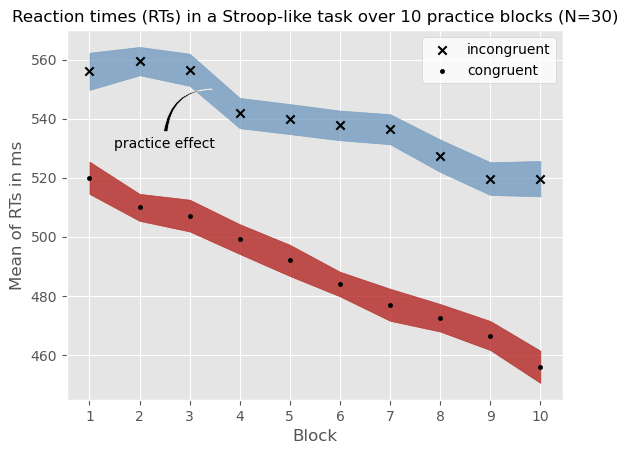

In [2]:
##### import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(42)

# Optional: choose a built-in matplotlib style (no external packages required)
plt.style.use('ggplot')

# Setup: Simulate RTs (ms) for N participants across 10 blocks for two conditions.
N = 30  # participants
blocks = np.arange(1, 11)

# Condition trends (means decrease with practice)
mu_congruent = 520 - 7 * (blocks - 1)         # starts ~520 ms, decreases
mu_incongruent = 560 - 5 * (blocks - 1)       # starts ~560 ms, decreases more slowly

# Between-participant variability and trial noise
between_sd = 25
trial_sd = 20

# Simulate participant-by-block matrices
base_cong = rng.normal(0, between_sd, size=(N, 1))
base_incong = rng.normal(0, between_sd, size=(N, 1))

rts_cong = mu_congruent + base_cong + rng.normal(0, trial_sd, size=(N, len(blocks)))
rts_incong = mu_incongruent + base_incong + rng.normal(0, trial_sd, size=(N, len(blocks)))

# Compute per-block means and SEMs
mean_cong = rts_cong.mean(axis=0)
mean_incong = rts_incong.mean(axis=0)
sem_cong = rts_cong.std(axis=0, ddof=1) / np.sqrt(N)
sem_incong = rts_incong.std(axis=0, ddof=1) / np.sqrt(N)

# YOUR CODE HERE
# - Create a figure and axis.
fig, ax = plt.subplots()

# - Add shaded SEM bands via fill_between.
sem_cong_upper = mean_cong + sem_cong
sem_cong_lower = mean_cong - sem_cong
sem_incong_upper = mean_incong + sem_incong
sem_incong_lower = mean_incong - sem_incong
plt.fill_between(blocks, sem_cong_lower, sem_cong_upper, color='#b42723', alpha=0.8)
plt.fill_between(blocks, sem_incong_lower, sem_incong_upper, color='#759cc0', alpha=0.8)

# - Plot mean_cong and mean_incong vs blocks with markers. -> plotted after fill to increase visibility of the scatter markers 
ax.scatter(blocks, mean_incong, marker='x', color='black', label='incongruent')
ax.scatter(blocks, mean_cong, marker='.', color='black', label='congruent')

# - Customize labels, title, xticks = blocks, legend.
ax.set_ylabel("Mean of RTs in ms")
ax.set_xlabel("Block")
ax.set_title("Reaction times (RTs) in a Stroop-like task over 10 practice blocks (N=30)", fontsize=12)
ax.xaxis.set(ticks=range(1, 11), ticklabels=range(1, 11)) 
ax.legend(facecolor='white')

# - Add an arrow annotation highlighting "practice effect" early blocks. 
plt.annotate('practice effect', xy=(3.5, 550), xytext=(1.5, 530),
            arrowprops=dict(arrowstyle='wedge', connectionstyle="angle3", facecolor="black")) 

# - Save as "learning_curves.png" with dpi=300. 
fig.savefig('learning_curves.png', dpi=300)

plt.show()

Reflection: When plotting learning curves, why show SEM or confidence intervals rather than only means?

We show SEM or confidence intervals so we can also communicate the range in which learning can be expected to happen.

## Exercise 2: Subplots: Histograms and boxplots of RT distributions

Context: We often compare RT distributions across conditions. Here, you will plot histograms side-by-side with a boxplot to visualize central tendency and spread.

Tasks:
- Create a 1×2 subplot layout with shared x-axis.
- Left subplot: overlay histograms for both conditions with transparency and a legend.
- Right subplot: boxplot showing the two distributions side-by-side (showmeans=True).
- Add axis labels, titles, and consistent x-limits; optionally add small "rug" marks.

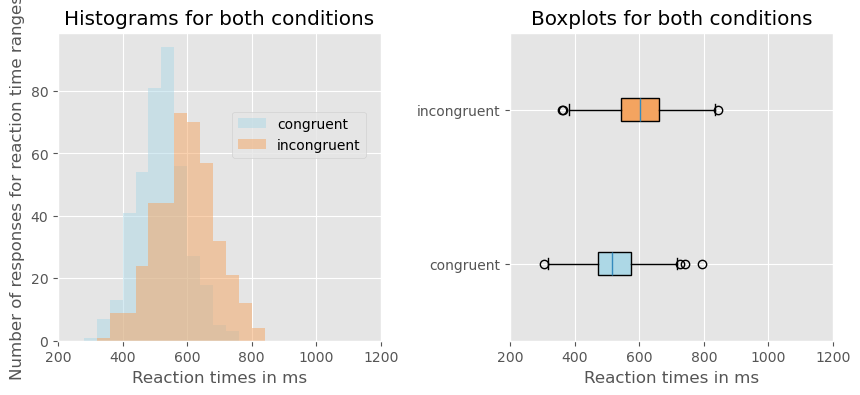

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(42)

# Setup: Generate synthetic RT (ms) samples for congruent and incongruent trials (e.g., 400 samples each).
n_samples = 400
rt_cong = np.clip(rng.normal(520, 80, size=n_samples), 200, 1200)
rt_incong = np.clip(rng.normal(600, 90, size=n_samples), 200, 1200)

bins = np.arange(200, 1201, 40)

# YOUR CODE HERE
# - Create a 1×2 subplot layout with shared x-axis.
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)


# - Left: histograms of rt_cong and rt_incong with bins, alpha, labels.
axes[0].hist(rt_cong, bins, alpha=0.5, label='congruent', color='lightblue')  
axes[0].hist(rt_incong, bins, alpha=0.5, label='incongruent', color='sandybrown')  
# if we wanted side-by-side histograms, use: axes[0].hist([rt_cong, rt_incong], bins, label=['congruent', 'incongruent'])


# - Right: boxplot of [rt_cong, rt_incong] with showmeans=True.
# just adapted the code from session04 for this, making the boxplots different colors
import reprlib 
#TODO: check whether there are better ways to indicate the means and sigmas through rt_cong and rt_incong respectively
means = [520, 600]  
sigmas = [80, 90]
nums = [n_samples, n_samples]

dists = [np.random.normal(*args) for args in zip(means, sigmas, nums)]  # what does np.random.normal(*args) do?
reprlib.repr(dists)

bp = axes[1].boxplot(dists, vert=False, patch_artist=True)  # creating horizontal boxplots so that the shared x-axis works

colors = ['lightblue', 'sandybrown']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)


# - Add titles, axis labels, legend; set x-limits [200, 1200].
axes[0].set(
    title='Histograms for both conditions',
    xlabel='Reaction times in ms',
    ylabel='Number of responses for reaction time ranges',
    xlim=[200, 1200],
    )
axes[1].set(
    title='Boxplots for both conditions',
    xlabel='Reaction times in ms',
    xlim=[200, 1200],
    )
axes[1].yaxis.set(ticks=range(1,3), ticklabels=('congruent', 'incongruent'))

fig.subplots_adjust(wspace=0.4)  # making space for y-axis labels on right subplot 
fig.legend(loc=(0.27, 0.6))

# TODO: Optionally add rug marks using small scatter points near y=0 on the left histogram.

# - Save the figure as "distribution_subplots.jpg". 
plt.show
fig.savefig('distribution_subplots.jpg')
# YOUR CODE HERE

Reflection: What advantages do subplots offer when comparing distributions?

When comparing distributions, subplots offer the advantage of displaying various angles of the comparison in the same place at a glance. Instead of having to skip around to different plots, everything is in one place but each subplot highlights a different insight from the data.

## Exercise 3: Heatmaps: Confusion matrix with colormap, colorbar, and annotations

Context: Confusion matrices summarize classification performance, e.g., responses to color words. We will build a 3×3 confusion matrix and visualize it with a heatmap, adding a colorbar and cell annotations.

Tasks:
- Compute a 3×3 confusion matrix (rows = true labels, cols = responses).
- Use imshow with a perceptually uniform colormap (e.g., "viridis") and add a colorbar.
- Set ticks and labels to category names; add minor gridlines between cells.
- Annotate each cell with its count, adjusting text color for contrast.
- Save the figure as "confusion_heatmap.pdf".

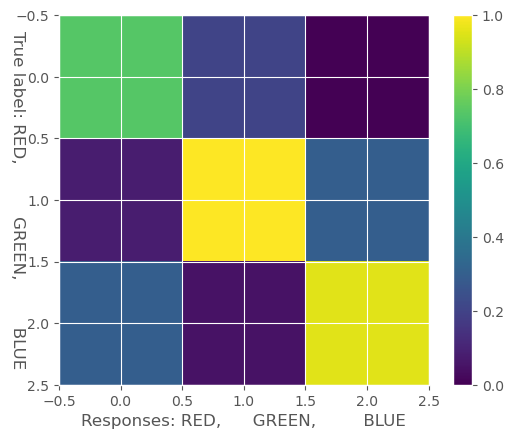

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(42)

# Setup: Simulate trials over three categories (RED, GREEN, BLUE) with some confusions.
labels = ['RED', 'GREEN', 'BLUE']
n_trials = 300

# True label sampling
true_labels = rng.choice(labels, size=n_trials)

# Response probabilities: correct with p_correct, otherwise uniformly confused
p_correct = 0.70
responses = []
for t in true_labels:
    if rng.random() < p_correct:
        responses.append(t)
    else:
        # choose one of the other two labels
        other = [lab for lab in labels if lab != t]
        responses.append(rng.choice(other))
# - Compute a 3×3 confusion matrix (rows = true labels, cols = responses).
# - Create fig, ax; use ax.imshow(cm, cmap='viridis') to plot the heatmap.
# - Add a colorbar.
# - Set x/y ticks to labels; rotate x tick labels if helpful.
# - Add minor gridlines to delineate cells.
# - Annotate counts inside cells; pick text color (white/black) based on value vs. colormap midpoint.
# - Tight layout and save as "confusion_heatmap.pdf".
# YOUR CODE HERE

mapping_1 = {"RED": 1, "GREEN": 2, "BLUE": 3}
mapping_2 = {"RED": 4, "GREEN": 5, "BLUE": 6}

true_labels_num = np.zeros(n_trials)
responses_num = np.zeros(n_trials)

for i in range(len(true_labels)):
    true_labels_num[i] = mapping_1[true_labels[i]]
    responses_num[i] = mapping_2[responses[i]]

from itertools import product
from matplotlib.pyplot import cm


res = list(true_labels_num*responses_num)

heatarray = np.zeros(9)
for i, (x,y) in enumerate(product([1,2,3], [4,5,6])):
    heatarray[i] = res.count(x*y)
    
heatarray = heatarray.reshape(3,3)


fig, ax = plt.subplots()
ax.imshow(heatarray, cmap="viridis")
fig.colorbar(cm.ScalarMappable(cmap="viridis"), ax=ax)
plt.xlabel("Responses: RED,      GREEN,         BLUE")
plt.ylabel("True label: RED,          GREEN,         BLUE", rotation=270)

plt.savefig(f"confusion_heatmap.pdf")